<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predictor-variable-rdm" data-toc-modified-id="Predictor-variable-rdm-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictor variable rdm</a></span></li><li><span><a href="#Full-feature-model" data-toc-modified-id="Full-feature-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Full feature model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Dimensional-model" data-toc-modified-id="Dimensional-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dimensional model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Categorical-model" data-toc-modified-id="Categorical-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Categorical model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Dimensional:-single-dimension" data-toc-modified-id="Dimensional:-single-dimension-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dimensional: single dimension</a></span><ul class="toc-item"><li><span><a href="#Formality" data-toc-modified-id="Formality-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Formality</a></span></li><li><span><a href="#Activeness" data-toc-modified-id="Activeness-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Activeness</a></span></li><li><span><a href="#Valence" data-toc-modified-id="Valence-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Valence</a></span></li><li><span><a href="#Exchange" data-toc-modified-id="Exchange-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Exchange</a></span></li><li><span><a href="#Equality" data-toc-modified-id="Equality-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Equality</a></span></li></ul></li><li><span><a href="#Categorical:-single-category" data-toc-modified-id="Categorical:-single-category-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Categorical: single category</a></span><ul class="toc-item"><li><span><a href="#Hostile" data-toc-modified-id="Hostile-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Hostile</a></span></li><li><span><a href="#Private" data-toc-modified-id="Private-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Private</a></span></li><li><span><a href="#Public" data-toc-modified-id="Public-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Public</a></span></li></ul></li><li><span><a href="#Plot-RSA-regression-results-in-Supplementary" data-toc-modified-id="Plot-RSA-regression-results-in-Supplementary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot RSA regression results in Supplementary</a></span><ul class="toc-item"><li><span><a href="#Dimensional" data-toc-modified-id="Dimensional-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Dimensional</a></span></li><li><span><a href="#Categorical" data-toc-modified-id="Categorical-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Categorical</a></span></li></ul></li></ul></div>

In [2]:
options(warn=-1)
library(openxlsx)
library(tidyverse)
library(reshape)

library(ggplot2)
library(RColorBrewer)
library(corrplot)
library(corrr)

In [3]:
regions_order = c(
    # English
    'USA','UK','Australia','South Africa',
    # Germany
    'Germany',
    # Japanese
    'Japan',
    # Hebrew
    'Israel',
    # Chinese
    'CHN','HK(region)',

    # French
    'France',
    # Spanish
    'Spain','Mexico','Chile',
    # Portuguese
    'Portugal','Brazil',
    # Russian
    'Russia',
    # Arabic
    'Egypt','Qatar',
    'India')

fix_region = function(df){
    regions = rownames(df)
    regions = str_replace(regions,'United States','USA')
    regions = str_replace(regions,'United Kingdom','UK')
    regions = str_replace(regions,'China','CHN')
    regions = str_replace(regions,'South_africa','South Africa')
    regions = str_replace(regions,'Spain','Spanish')
    regions = str_replace(regions,'HK','HK(region)')
    regions = gsub('Hong Kong SAR, CHN','HK(region)',regions,fixed=TRUE)
    regions = str_replace(regions,'Hong Kong','HK(region)')
    regions = str_replace(regions,'Spanish','Spain')
    regions = str_replace(regions,'Russian Federation','Russia')
    regions = str_replace(regions,'Russian','Russia')
    regions = str_replace(regions,'Egypt, Arab Rep.','Egypt')
    
    rownames(df) = regions
    colnames(df) = regions
    
    df = df[regions_order,regions_order]
    return(df)
}

lowerTriangle <- function(m){
  return(m[lower.tri(m,diag = FALSE)])
}

# Predictor variable rdm

In [4]:
# Language
#Lexical = read.csv('../Cultural_RDM/rdm/Lexical_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Lexical = read.csv('../Cultural_RDM/rdm/linguistic_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Lexical = fix_region(Lexical)

# Personality
Agreeableness = read.csv('../Cultural_RDM/rdm/Agreeableness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Agreeableness = fix_region(Agreeableness)
Conscientiousness = read.csv('../Cultural_RDM/rdm/Conscientiousness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Conscientiousness = fix_region(Conscientiousness)
Extraversion = read.csv('../Cultural_RDM/rdm/Extraversion_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Extraversion = fix_region(Extraversion)
Neuroticism = read.csv('../Cultural_RDM/rdm/Neuroticism_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Neuroticism = fix_region(Neuroticism)
Openness = read.csv('../Cultural_RDM/rdm/Openness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Openness = fix_region(Openness)
personality_all = read.csv('../Cultural_RDM/rdm/personality_all_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
personality_all = fix_region(personality_all)

# Socioecological
Climatic_demands = read.csv('../Cultural_RDM/rdm/Climatic_demands_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Climatic_demands = fix_region(Climatic_demands)
Coordinate = read.csv('../Cultural_RDM/rdm/Coordinate_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Coordinate = fix_region(Coordinate)
subsistence = read.csv('../Cultural_RDM/rdm/subsistence_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
subsistence = fix_region(subsistence)
disease = read.csv('../Cultural_RDM/rdm/disease_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
disease = fix_region(disease)

# Modernization
urban = read.csv('../Cultural_RDM/rdm/urban_rdm.csv', row.names=1, encoding = "UTF-8")
urban = fix_region(urban)
wealth = read.csv('../Cultural_RDM/rdm/wealth_rdm.csv', row.names=1, encoding = "UTF-8")
wealth = fix_region(wealth)
edu = read.csv('../Cultural_RDM/rdm/edu_rdm.csv', row.names=1, encoding = "UTF-8")
edu = fix_region(edu)
modern = read.csv('../Cultural_RDM/rdm/modern_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
modern = fix_region(modern)

# Cultural value
## Hofstede 6D
power = read.csv('../Cultural_RDM/rdm/power_rdm.csv', row.names=1, encoding = "UTF-8")
power = fix_region(power)
Individualism = read.csv('../Cultural_RDM/rdm/Individualism_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Individualism = fix_region(Individualism)
Masculine = read.csv('../Cultural_RDM/rdm/Masculine_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Masculine = fix_region(Masculine)
Uncertainty_Avoidance = read.csv('../Cultural_RDM/rdm/Uncertainty_Avoidance_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Uncertainty_Avoidance = fix_region(Uncertainty_Avoidance)
Long_Term_Orientation = read.csv('../Cultural_RDM/rdm/Long_Term_Orientation_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Long_Term_Orientation = fix_region(Long_Term_Orientation)
Indulgence = read.csv('../Cultural_RDM/rdm/Indulgence_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Indulgence = fix_region(Indulgence)
Hofstede_6D = read.csv('../Cultural_RDM/rdm/Hofstede_6D_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Hofstede_6D = fix_region(Hofstede_6D)

# Gene
new_gendist_weighted = read.csv('../Cultural_RDM/rdm/new_gendist_weighted_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
new_gendist_weighted = fix_region(new_gendist_weighted)

# Religion
reldist_weighted_WCD_form = read.csv('../Cultural_RDM/rdm/reldist_weighted_WCD_form_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
reldist_weighted_WCD_form = fix_region(reldist_weighted_WCD_form)
religion_per = read.csv('../Cultural_RDM/rdm/religion_percentage_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
religion_per = fix_region(religion_per)

# Political
idealogy = read.csv('../Cultural_RDM/rdm/political_idealogy_rdm_range.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
idealogy = fix_region(idealogy)

In [5]:
# Demographics
gender = read.csv('../DataClean_FAVEE_HPP/output_data/rdm/gender_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
gender = fix_region(gender)
age = read.csv('../DataClean_FAVEE_HPP/output_data/rdm/age_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
age = fix_region(age)
education_ind = read.csv('../DataClean_FAVEE_HPP/output_data/rdm/education_ind_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
education_ind = fix_region(education_ind)
demographics = read.csv('../DataClean_FAVEE_HPP/output_data/rdm/demographics_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
demographics = fix_region(demographics)

# check size
check_size = read.csv('../DataClean_FAVEE_HPP/output_data/rdm/check_size_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
check_size = fix_region(check_size)

In [6]:
# get rdms of predicators 
variables_names <- c('Lexical',# Language
                     'personality_all',# Personality
                     'Coordinate','Climatic_demands','subsistence','disease',# Socioecological
                     #'modern',# Modernization
                     'urban','wealth','edu',
                     'Hofstede_6D',# Cultural value
                     'new_gendist_weighted',# Gene
                     'religion_per',#'reldist_weighted_WCD_form',# Religion
                     'idealogy',# Political
                     'demographics',# Demographics
                     'check_size'
                    )

variables <- list()
for(i in c(1:length(variables_names))){
  variables[[i]] = get(variables_names[i])
}

In [7]:
permutation_result = function(culture_regress_standard_model){
    # create permutation matrix
    nperm <- 10000
    permf <- matrix(NA,nperm)
    permr2 <- matrix(NA,nperm)
    # contain beta_sub
    permt <- matrix(NA,nperm,length(variables_names)) # 12variables
    colnames(permt) <- variables_names
    # caculate proportation of beta_sub or F value over the model results
    permf_pvals <- NA 
    permt_pvals <- NA
    tstats = NA

    # the model results
    fstats <- culture_regress_standard_model$fstatistic[[1]]
    for (i in 1:length(variables_names)){
      tstats[i] <- culture_regress_standard_model$coefficients[1+i,1]
    }
    r2stats <- culture_regress_standard_model$r.squared
    print(paste('fstats:',fstats))
    #print('tstats:')
    #tstats
    print(paste('r2stats:',r2stats))

    set.seed(2)
    for (i in 1:nperm){
      psel <- sample(19) # permuted index, total 19 regions
      x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x[psel,psel]))) # generate permuted predictors
      rfit <- lm(scale(model_rdm_array)~scale(x)) # fit permuted model
      srfit <- summary(rfit)
      permf[i,1] <- srfit$fstatistic[1] # F-stat
      permr2[i,1] <- srfit$r.squared # R-squared
      #permf[,i] <- unlist(lapply(srfit,function(x) x$fstatistic[1])) # F-stat
      #permr2[,i] <- unlist(lapply(srfit,function(x) x$r.squared)) # R-squared
      for (j in 1:length(variables_names)){
        permt[i,j] <- srfit$coefficients[1+j,1] # each var t-stat
      }
      #print(i)
    }
    print(i)

    # F statistics
    permf_pvals <- mean(permf[,1] >= fstats)
    print(paste('permf_pvals',permf_pvals))

    # Each variable's regression
    for (i in 1:length(variables_names)){
      permt_pvals[i] <- mean(permt[,i] >= tstats[i])
    }

    permt_pvals <- as.data.frame(t(permt_pvals)) 

    colnames(permt_pvals) <- variables_names
    return(permt_pvals)
} 

# Full feature model

## regression coefficient

In [9]:
model_rdm = read.csv('output_data/models_rdm/full_feature/raw33d_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/rsa_results/beta_sub/check_size/raw_33d.csv')
full_feature_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65863 -0.38053  0.04887  0.36493  2.30438 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.060e-16  4.729e-02   0.000 1.000000    
scale(x)Lexical               9.084e-02  7.837e-02   1.159 0.248199    
scale(x)personality_all       1.456e-01  5.438e-02   2.677 0.008232 ** 
scale(x)Coordinate           -1.217e-01  5.731e-02  -2.123 0.035334 *  
scale(x)Climatic_demands      1.984e-01  5.399e-02   3.675 0.000327 ***
scale(x)subsistence          -4.499e-02  5.537e-02  -0.813 0.417689    
scale(x)disease              -1.353e-02  5.615e-02  -0.241 0.809879    
scale(x)urban                 4.449e-01  5.735e-02   7.756 1.09e-12 ***
scale(x)wealth               -7.237e-02  5.963e-02  -1.214 0.226683    
scale(x)edu                   1.234e-01  5.318e-02   2.320 0.021629 *  
scale(x)Hofstede_6D          -8.65

## permutation

In [10]:
p_value_sub = permutation_result(full_feature_regression)
p_value_sub
write.csv(p_value_sub,'output_data/rsa_results/p_value_sub/check_size/raw_33d.csv')

[1] "fstats: 19.3016372163525"
[1] "r2stats: 0.651312852968471"
[1] 10000
[1] "permf_pvals 3e-04"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3692,0.1882,0.7758,0.156,0.6136,0.5745,0.018,0.6926,0.203,0.7002,0.7002,0.1088,0.7158,0.3947,0.4393


# Dimensional model

## regression coefficient

In [11]:
model_rdm = read.csv('output_data/models_rdm/dimensional/favee_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/rsa_results/beta_sub/check_size/favee_33d.csv')
dimensional_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27002 -0.41266  0.03662  0.41651  1.87599 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   7.098e-17  5.080e-02   0.000  1.00000    
scale(x)Lexical              -4.709e-02  8.419e-02  -0.559  0.57672    
scale(x)personality_all       1.877e-01  5.842e-02   3.213  0.00160 ** 
scale(x)Coordinate           -1.266e-01  6.156e-02  -2.056  0.04146 *  
scale(x)Climatic_demands      1.877e-01  5.800e-02   3.236  0.00148 ** 
scale(x)subsistence          -5.266e-03  5.948e-02  -0.089  0.92957    
scale(x)disease              -2.723e-02  6.032e-02  -0.451  0.65236    
scale(x)urban                 3.260e-01  6.161e-02   5.291 4.08e-07 ***
scale(x)wealth               -7.709e-02  6.405e-02  -1.203  0.23063    
scale(x)edu                   1.221e-01  5.713e-02   2.137  0.03417 *  
scale(x)Hofstede_6D          -1.24

## permutation

In [12]:
p_value_sub = permutation_result(dimensional_regression)
p_value_sub
write.csv(p_value_sub,'output_data/rsa_results/p_value_sub/check_size/favee_33d.csv')

[1] "fstats: 15.3484797452628"
[1] "r2stats: 0.597640038041342"
[1] 10000
[1] "permf_pvals 0.0018"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5726,0.1773,0.7902,0.1809,0.5019,0.6324,0.0502,0.7076,0.2069,0.7729,0.8385,0.0481,0.7296,0.3322,0.3594


# Categorical model

## regression coefficient

In [13]:
model_rdm = read.csv('output_data/models_rdm/categorical/hpp_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/rsa_results/beta_sub/check_size/hpp_33d.csv')
categorical_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.25944 -0.53717  0.09422  0.55414  2.36395 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.337e-16  6.404e-02   0.000 1.000000    
scale(x)Lexical               2.381e-01  1.061e-01   2.243 0.026309 *  
scale(x)personality_all       4.999e-02  7.365e-02   0.679 0.498327    
scale(x)Coordinate           -1.639e-01  7.761e-02  -2.112 0.036293 *  
scale(x)Climatic_demands      1.817e-01  7.312e-02   2.484 0.014042 *  
scale(x)subsistence           2.285e-02  7.498e-02   0.305 0.760960    
scale(x)disease              -5.205e-02  7.605e-02  -0.685 0.494672    
scale(x)urban                 3.068e-01  7.767e-02   3.951 0.000118 ***
scale(x)wealth                7.999e-02  8.075e-02   0.991 0.323458    
scale(x)edu                   3.215e-02  7.202e-02   0.446 0.655959    
scale(x)Hofstede_6D          -8.95

## permutation

In [14]:
p_value_sub = permutation_result(categorical_regression)
p_value_sub
write.csv(p_value_sub,'output_data/rsa_results/p_value_sub/check_size/hpp_33d.csv')

[1] "fstats: 5.82624085986409"
[1] "r2stats: 0.360544206809405"
[1] 10000
[1] "permf_pvals 0.0723"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1538,0.3213,0.8911,0.1195,0.4128,0.729,0.0435,0.2414,0.3656,0.7279,0.5979,0.2229,0.6908,0.9858,0.7492


In [15]:
variables_name_final = c(
    'Language',
    'Personality',
    'Geography',
    'Climates',
    'Subsistence',
    'Disease',
    'Urbanization',
    'Wealth',
    'Education',
    'Hofstede6D',
    'Gene',
    'Religion',
    'Politics',
    'Demographics',
    'Object knowledge')

output_order = c('Climates','Demographics','Disease','Education','Gene','Geography',
                'Hofstede6D','Language','Personality','Politics','Religion','Subsistence',
                'Urbanization','Wealth','Object knowledge')

In [16]:
full_feature_beta = read.csv('output_data/rsa_results/beta_sub/check_size/raw_33d.csv',row.names=1)
full_feature_beta = full_feature_beta[2:16,'Estimate']

favee_beta = read.csv('output_data/rsa_results/beta_sub/check_size/favee_33d.csv',row.names=1)
favee_beta = favee_beta[2:16,'Estimate']

hpp_beta = read.csv('output_data/rsa_results/beta_sub/check_size/hpp_33d.csv',row.names=1)
hpp_beta = hpp_beta[2:16,'Estimate']

In [17]:
full_feature_p = read.csv('output_data/rsa_results/p_value_sub/check_size/raw_33d.csv',row.names=1)
full_feature_p = t(full_feature_p)[1:15,]

favee_p = read.csv('output_data/rsa_results/p_value_sub/check_size/favee_33d.csv',row.names=1)
favee_p = t(favee_p)[1:15,]

hpp_p = read.csv('output_data/rsa_results/p_value_sub/check_size/hpp_33d.csv',row.names=1)
hpp_p = t(hpp_p)[1:15,]

In [18]:
rsa_result = data.frame(full_r = full_feature_beta,full_p = full_feature_p,
                        favee_r = favee_beta,favee_p = favee_p,
                        hpp_r = hpp_beta,hpp_p = hpp_p)
rownames(rsa_result) = variables_name_final
rsa_result = rsa_result[output_order,]
rsa_result = round(rsa_result,3)
rsa_result
write.csv(rsa_result,'output_data/rsa_results/follow_up_analysis.csv')

,full_r,full_p,favee_r,favee_p,hpp_r,hpp_p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Climates,0.198,0.156,0.188,0.181,0.182,0.120
Demographics,0.035,0.395,0.063,0.332,-0.278,0.986
Disease,-0.014,0.575,-0.027,0.632,-0.052,0.729
Education,0.123,0.203,0.122,0.207,0.032,0.366
Gene,-0.139,0.700,-0.230,0.839,-0.065,0.598
Geography,-0.122,0.776,-0.127,0.790,-0.164,0.891
Hofstede6D,-0.087,0.700,-0.125,0.773,-0.090,0.728
Language,0.091,0.369,-0.047,0.573,0.238,0.154
Personality,0.146,0.188,0.188,0.177,0.050,0.321


# Dimensional: single dimension

## Formality

In [19]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/formality_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/rsa_results/beta_sub/check_size/formality_33d.csv')
formality_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(formality_regression)
p_value_sub
write.csv(p_value_sub,'output_data/rsa_results/p_value_sub/check_size/formality_33d.csv')


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.11347 -0.47424  0.06329  0.46635  1.87872 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -2.977e-16  5.684e-02   0.000 1.000000    
scale(x)Lexical              -3.544e-01  9.421e-02  -3.762 0.000239 ***
scale(x)personality_all       5.911e-02  6.537e-02   0.904 0.367323    
scale(x)Coordinate           -1.975e-01  6.889e-02  -2.868 0.004712 ** 
scale(x)Climatic_demands      6.586e-02  6.490e-02   1.015 0.311816    
scale(x)subsistence          -6.763e-02  6.656e-02  -1.016 0.311139    
scale(x)disease              -6.892e-02  6.750e-02  -1.021 0.308813    
scale(x)urban                 7.631e-02  6.894e-02   1.107 0.270086    
scale(x)wealth               -1.299e-01  7.167e-02  -1.812 0.071871 .  
scale(x)edu                   1.460e-01  6.393e-02   2.285 0.023695 *  
scale(x)Hofstede_6D          -5.75

[1] "fstats: 10.1774061602122"
[1] "r2stats: 0.496198889533694"
[1] 10000
[1] "permf_pvals 0.006"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9301,0.342,0.9247,0.3248,0.6909,0.7875,0.3144,0.8531,0.1503,0.5139,0.6905,0.0012,0.6301,0.568,0.0561


## Activeness

In [20]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/activeness_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/rsa_results/beta_sub/check_size/activeness_33d.csv')
activeness_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(activeness_regression)
p_value_sub
write.csv(p_value_sub,'output_data/rsa_results/p_value_sub/check_size/activeness_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.46213 -0.45139  0.04742  0.52119  2.24763 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   5.724e-16  6.486e-02   0.000 1.000000    
scale(x)Lexical              -1.319e-01  1.075e-01  -1.227 0.221681    
scale(x)personality_all       1.311e-01  7.459e-02   1.758 0.080705 .  
scale(x)Coordinate           -1.131e-01  7.860e-02  -1.439 0.152163    
scale(x)Climatic_demands      4.781e-02  7.405e-02   0.646 0.519511    
scale(x)subsistence          -2.503e-02  7.594e-02  -0.330 0.742187    
scale(x)disease              -5.605e-02  7.702e-02  -0.728 0.467881    
scale(x)urban                 2.751e-01  7.866e-02   3.498 0.000612 ***
scale(x)wealth               -9.944e-02  8.178e-02  -1.216 0.225874    
scale(x)edu                   1.384e-01  7.294e-02   1.898 0.059591 .  
scale(x)Hofstede_6D          -9.66

[1] "fstats: 5.42114936948858"
[1] "r2stats: 0.344102023008191"
[1] 10000
[1] "permf_pvals 0.0735"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7189,0.215,0.7924,0.3656,0.5582,0.7408,0.0483,0.7849,0.1418,0.5275,0.4997,0.0306,0.7843,0.4231,0.4787


## Valence

In [21]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/valence_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/rsa_results/beta_sub/check_size/valence_33d.csv')
valence_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(valence_regression)
p_value_sub
write.csv(p_value_sub,'output_data/rsa_results/p_value_sub/check_size/valence_33d.csv')                          


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.78316 -0.54560 -0.02267  0.49473  2.22229 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   2.163e-16  6.285e-02   0.000 1.000000    
scale(x)Lexical              -2.685e-01  1.042e-01  -2.578 0.010875 *  
scale(x)personality_all       1.122e-01  7.227e-02   1.552 0.122650    
scale(x)Coordinate           -5.272e-02  7.616e-02  -0.692 0.489804    
scale(x)Climatic_demands      1.831e-01  7.175e-02   2.552 0.011682 *  
scale(x)subsistence          -1.798e-01  7.358e-02  -2.443 0.015671 *  
scale(x)disease              -7.032e-02  7.462e-02  -0.942 0.347465    
scale(x)urban                 2.865e-01  7.622e-02   3.758 0.000242 ***
scale(x)wealth               -9.029e-04  7.924e-02  -0.011 0.990923    
scale(x)edu                   1.573e-01  7.068e-02   2.225 0.027517 *  
scale(x)Hofstede_6D          -1.32

[1] "fstats: 6.44740754077954"
[1] "r2stats: 0.384214713113517"
[1] 10000
[1] "permf_pvals 0.1954"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.853,0.2555,0.6099,0.1771,0.9075,0.8008,0.0671,0.479,0.1473,0.8016,0.2752,0.0719,0.6377,0.1896,0.5093


## Exchange

In [22]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/exchange_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/rsa_results/beta_sub/check_size/exchange_33d.csv')
exchange_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(exchange_regression)
p_value_sub
write.csv(p_value_sub,'output_data/rsa_results/p_value_sub/check_size/exchange_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13864 -0.57332 -0.05492  0.56146  2.04401 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   4.797e-16  6.965e-02   0.000 1.000000    
scale(x)Lexical               2.330e-02  1.154e-01   0.202 0.840336    
scale(x)personality_all      -6.917e-02  8.010e-02  -0.864 0.389171    
scale(x)Coordinate           -5.639e-02  8.441e-02  -0.668 0.505075    
scale(x)Climatic_demands      1.421e-02  7.953e-02   0.179 0.858417    
scale(x)subsistence           6.070e-02  8.155e-02   0.744 0.457855    
scale(x)disease              -5.221e-03  8.271e-02  -0.063 0.949753    
scale(x)urban                 2.878e-01  8.448e-02   3.407 0.000836 ***
scale(x)wealth               -4.826e-02  8.783e-02  -0.549 0.583468    
scale(x)edu                   1.398e-01  7.833e-02   1.784 0.076344 .  
scale(x)Hofstede_6D           6.66

[1] "fstats: 3.32696234066983"
[1] "r2stats: 0.243549804489324"
[1] 10000
[1] "permf_pvals 0.6765"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4675,0.6081,0.6207,0.3951,0.3173,0.514,0.0618,0.6322,0.1669,0.4859,0.8292,0.2475,0.9497,0.3956,0.6827


## Equality

In [23]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/equality_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/rsa_results/beta_sub/check_size/equality_33d.csv')
equality_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(equality_regression)
p_value_sub
write.csv(p_value_sub,'output_data/rsa_results/p_value_sub/check_size/equality_33d.csv')                          


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.40012 -0.47213  0.09744  0.46334  1.37367 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.014e-16  5.403e-02   0.000 1.000000    
scale(x)Lexical              -1.658e-01  8.954e-02  -1.852 0.065965 .  
scale(x)personality_all       2.876e-01  6.213e-02   4.629 7.72e-06 ***
scale(x)Coordinate           -1.281e-01  6.547e-02  -1.956 0.052285 .  
scale(x)Climatic_demands      8.638e-02  6.168e-02   1.400 0.163373    
scale(x)subsistence          -6.855e-03  6.326e-02  -0.108 0.913841    
scale(x)disease               1.023e-02  6.415e-02   0.159 0.873510    
scale(x)urban                 2.504e-01  6.552e-02   3.821 0.000192 ***
scale(x)wealth               -3.461e-02  6.812e-02  -0.508 0.612124    
scale(x)edu                   1.308e-01  6.076e-02   2.153 0.032902 *  
scale(x)Hofstede_6D          -1.13

[1] "fstats: 12.3734546129319"
[1] "r2stats: 0.544923158758219"
[1] 10000
[1] "permf_pvals 0.0046"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7447,0.063,0.8039,0.2928,0.4955,0.4496,0.0821,0.5888,0.1738,0.761,0.8014,0.0289,0.7311,0.2109,0.226


# Categorical: single category

## Hostile

In [24]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/hostile_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/rsa_results/beta_sub/check_size/hostile_33d.csv')
hostile_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(hostile_regression)
p_value_sub
write.csv(p_value_sub,'output_data/rsa_results/p_value_sub/check_size/hostile_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.14772 -0.57849 -0.02928  0.70692  1.75159 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.418e-17  7.071e-02   0.000 1.000000    
scale(x)Lexical               4.001e-01  1.172e-01   3.414 0.000816 ***
scale(x)personality_all       1.998e-02  8.131e-02   0.246 0.806231    
scale(x)Coordinate           -1.135e-01  8.569e-02  -1.324 0.187422    
scale(x)Climatic_demands      5.227e-02  8.073e-02   0.648 0.518239    
scale(x)subsistence           2.303e-01  8.279e-02   2.782 0.006072 ** 
scale(x)disease               4.653e-02  8.396e-02   0.554 0.580266    
scale(x)urban                 1.135e-01  8.575e-02   1.324 0.187451    
scale(x)wealth               -1.919e-02  8.915e-02  -0.215 0.829860    
scale(x)edu                   4.481e-02  7.952e-02   0.563 0.573921    
scale(x)Hofstede_6D           1.86

[1] "fstats: 2.92373777375977"
[1] "r2stats: 0.220541758442817"
[1] 10000
[1] "permf_pvals 0.0451"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0066,0.3986,0.8656,0.2918,0.0244,0.2549,0.1527,0.5441,0.3041,0.4225,0.9487,0.6962,0.442,0.9444,0.9785


## Private

In [25]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/private_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/rsa_results/beta_sub/check_size/private_33d.csv')
private_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(private_regression)
p_value_sub
write.csv(p_value_sub,'output_data/rsa_results/p_value_sub/check_size/private_33d.csv')                           


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5357 -0.5171 -0.0635  0.6406  2.4915 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -2.038e-16  6.881e-02   0.000 1.000000    
scale(x)Lexical               2.600e-01  1.140e-01   2.280 0.023951 *  
scale(x)personality_all      -8.938e-03  7.913e-02  -0.113 0.910212    
scale(x)Coordinate           -1.357e-01  8.338e-02  -1.628 0.105598    
scale(x)Climatic_demands      1.481e-01  7.856e-02   1.885 0.061262 .  
scale(x)subsistence          -8.473e-02  8.056e-02  -1.052 0.294532    
scale(x)disease              -1.021e-01  8.170e-02  -1.250 0.213154    
scale(x)urban                 2.371e-01  8.345e-02   2.841 0.005104 ** 
scale(x)wealth                1.261e-01  8.676e-02   1.454 0.148073    
scale(x)edu                  -2.968e-02  7.738e-02  -0.384 0.701857    
scale(x)Hofstede_6D          -9.391e-02  8.5

[1] "fstats: 3.66573522121152"
[1] "r2stats: 0.261855651819165"
[1] 10000
[1] "permf_pvals 0.1748"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1063,0.4786,0.8592,0.1546,0.7558,0.886,0.0651,0.1358,0.5598,0.7524,0.4462,0.2376,0.7261,0.9934,0.6938


## Public

In [26]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/public_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/rsa_results/beta_sub/check_size/public_33d.csv')
public_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(public_regression)
p_value_sub
write.csv(p_value_sub,'output_data/rsa_results/p_value_sub/check_size/public_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.70596 -0.50744 -0.04218  0.51511  2.39516 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.843e-16  6.073e-02   0.000 1.000000    
scale(x)Lexical               1.359e-01  1.007e-01   1.350 0.178854    
scale(x)personality_all       7.003e-02  6.984e-02   1.003 0.317613    
scale(x)Coordinate           -1.603e-01  7.360e-02  -2.178 0.030951 *  
scale(x)Climatic_demands      1.651e-01  6.934e-02   2.381 0.018477 *  
scale(x)subsistence           1.256e-02  7.111e-02   0.177 0.860071    
scale(x)disease              -4.285e-02  7.212e-02  -0.594 0.553283    
scale(x)urban                 3.761e-01  7.366e-02   5.106 9.53e-07 ***
scale(x)wealth                6.518e-02  7.658e-02   0.851 0.396027    
scale(x)edu                   5.098e-02  6.830e-02   0.746 0.456531    
scale(x)Hofstede_6D          -1.05

[1] "fstats: 7.63444860669972"
[1] "r2stats: 0.424896552739758"
[1] 10000
[1] "permf_pvals 0.0481"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2929,0.2778,0.8768,0.1408,0.4506,0.6989,0.0292,0.2834,0.3152,0.747,0.5768,0.1434,0.7182,0.9702,0.6447


# Plot RSA regression results in Supplementary

In [27]:
files = dir('output_data/rsa_results/beta_sub/check_size/')
files = files[-which(files %in% c('favee_33d.csv','hpp_33d.csv','raw_33d.csv'))]
models = c()
regression_results = data.frame(matrix(ncol=13,nrow=7))
count = 1
for (file in files){
    model = strsplit(file,'_')[[1]][1]
    models = c(models,model)
    
    results_df = read.csv(paste('output_data/rsa_results/beta_sub/check_size/',file,sep = ''),row.names=1) 
    beta = results_df[2:14,1]
    regression_results[count,] = beta 
    count = count + 1
}
rownames(regression_results) = models
colnames(regression_results) = c('Language','Personality','Geography','Climates',
             'Subsistence','Disease','Urbanization','Wealth','Education',
             'Hofstede6D','Genetics','Religion','Politics')#'Demographics'
regression_results = data.frame(t(regression_results))

regression_results['Predictor'] = rownames(regression_results)
regression_results
regression_results_melt = melt(regression_results,id.vars = 'Predictor')
regression_results_melt$Predictor = factor(regression_results_melt$Predictor,
levels = c('Language','Personality','Geography','Climates',
             'Subsistence','Disease',
             'Hofstede6D','Genetics','Politics',#'Demographics',
             'Urbanization','Wealth','Education','Religion'))
colnames(regression_results_melt) = c('predictor','model','value')
regression_results_melt$'model' = factor(regression_results_melt$'model',
                            levels = c('formality','activeness','valence','exchange',
                                      'equality','hostile','private','public'))

,activeness,equality,exchange,formality,hostile,private,public,valence,Predictor
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Language,-0.131893520,-0.165799354,0.023295603,-0.354408599,0.400109756,0.260033191,0.13592415,-0.2684871514,Language
Personality,0.131135252,0.287588586,-0.069172853,0.059105210,0.019979317,-0.008937943,0.07002666,0.1121827388,Personality
Geography,-0.113109434,-0.128051893,-0.056394338,-0.197543552,-0.113456695,-0.135733586,-0.16027273,-0.0527236443,Geography
Climates,0.047805644,0.086383638,0.014210136,0.065856271,0.052273475,0.148103615,0.16510529,0.1830999160,Climates
Subsistence,-0.025025957,-0.006855075,0.060696172,-0.067630838,0.230315169,-0.084733682,0.01255638,-0.1797911322,Subsistence
Disease,-0.056046737,0.010229947,-0.005220571,-0.068920944,0.046526520,-0.102135100,-0.04284794,-0.0703245448,Disease
Urbanization,0.275142970,0.250368182,0.287829096,0.076306180,0.113537265,0.237070117,0.37611104,0.2864702144,Urbanization
Wealth,-0.099437238,-0.034610204,-0.048258727,-0.129897796,-0.019189448,0.126112120,0.06517616,-0.0009029001,Wealth
Education,0.138425954,0.130785706,0.139766692,0.146049582,0.044806594,-0.029677529,0.05098405,0.1572651671,Education


In [28]:
max(regression_results[,1:8])
min(regression_results[,1:8])

[1] 0.6870098

[1] -0.3544086

png 
  2

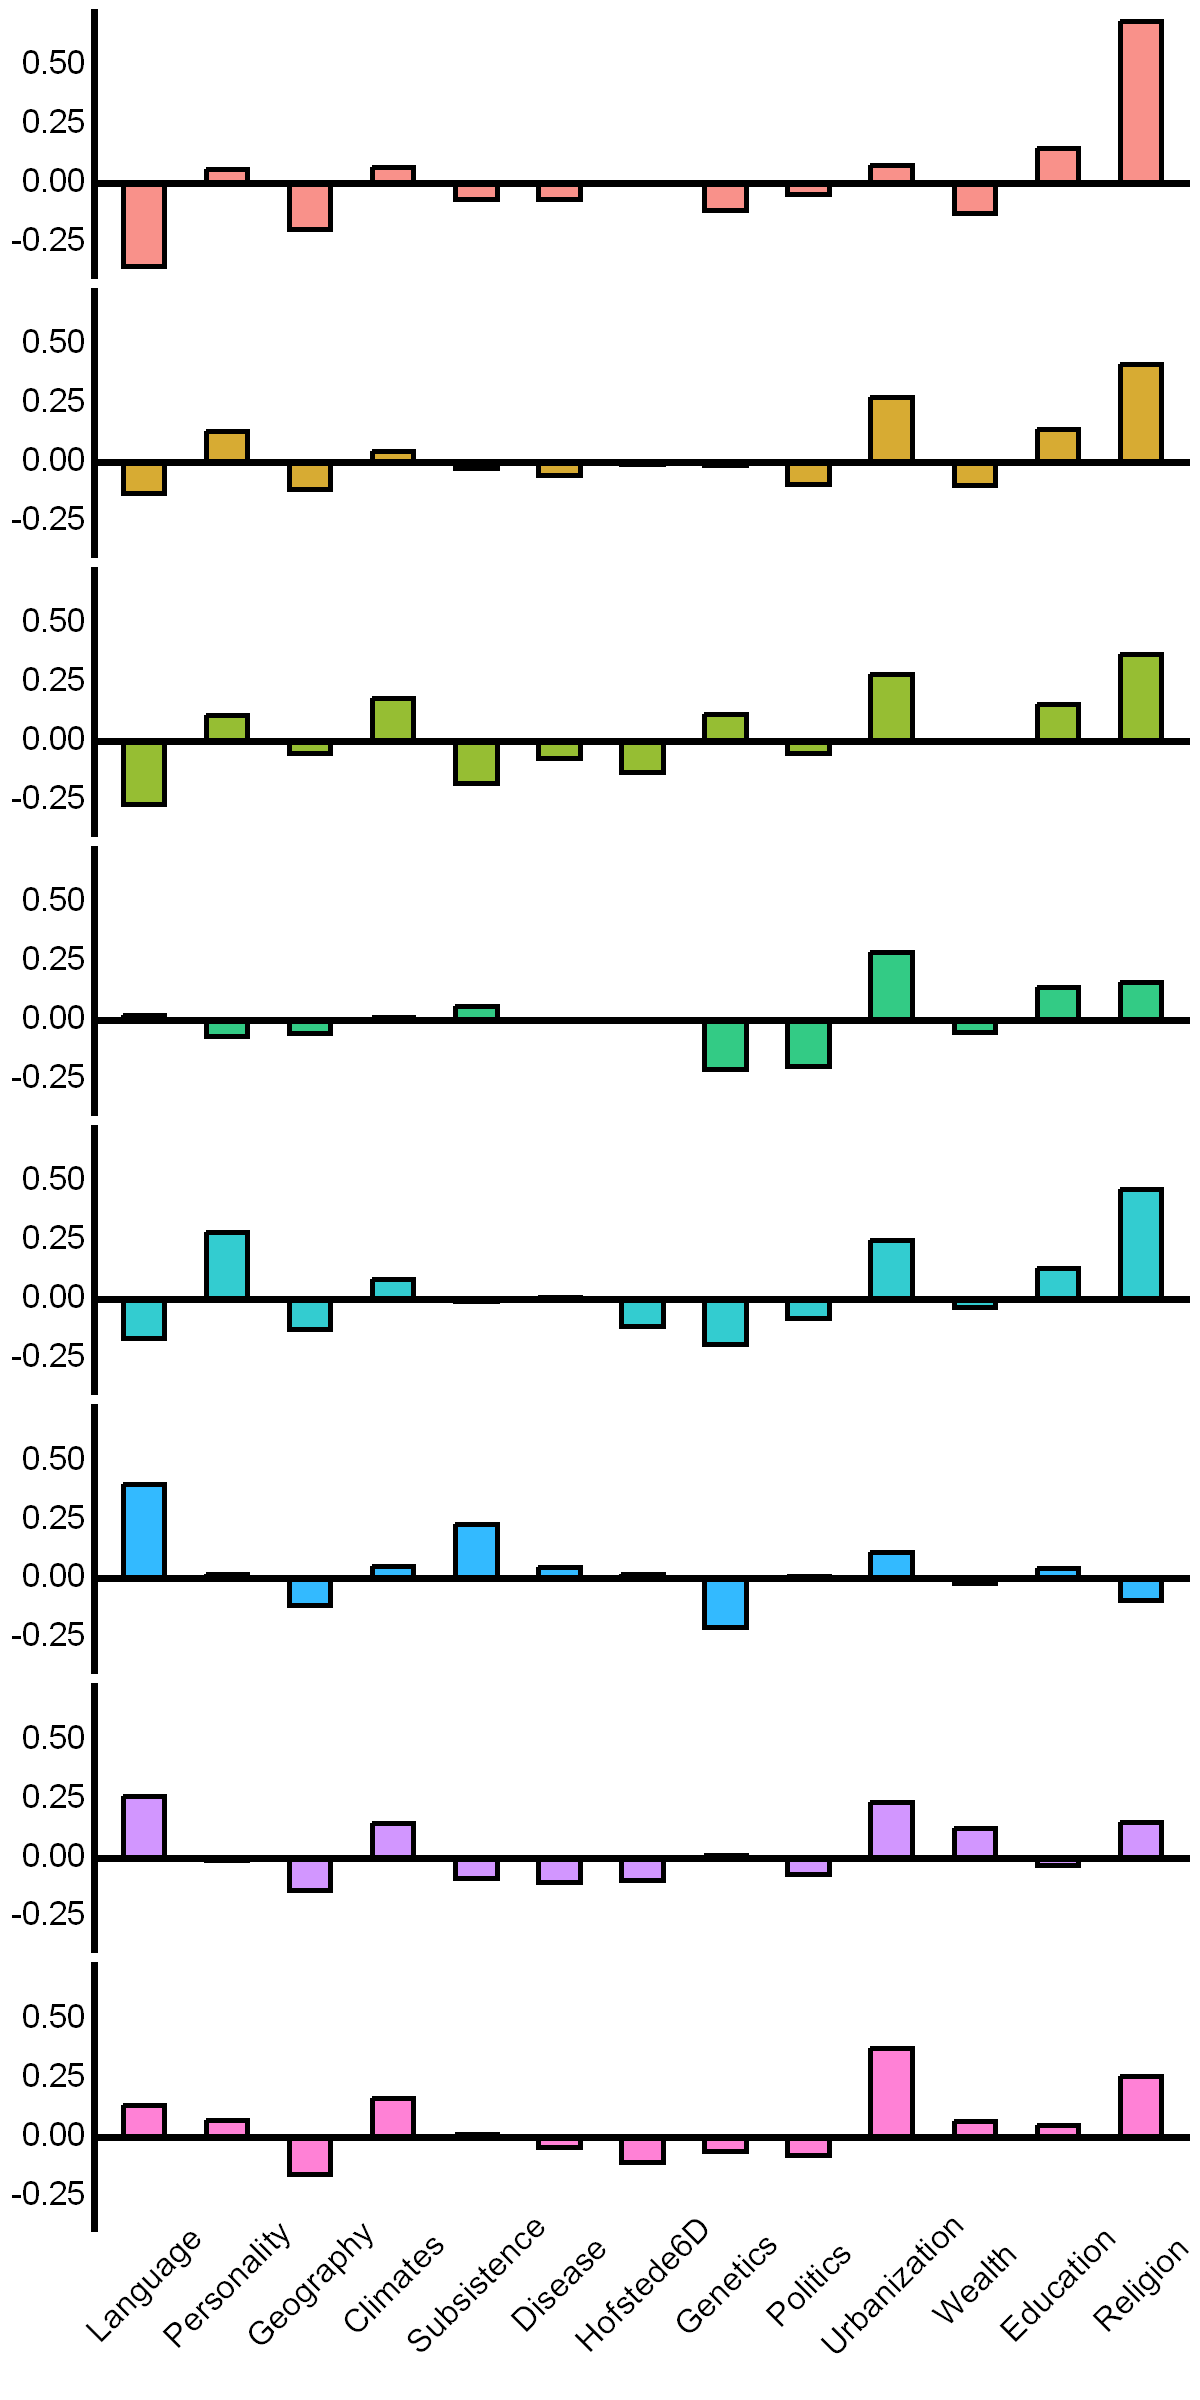

In [29]:
options(repr.plot.width=10,repr.plot.height=20)
ggplot(regression_results_melt,aes(x=predictor,y=value,fill=model))+
geom_bar(stat='identity',width=0.5,alpha=0.8,color='black',size=1.5)+
facet_grid(model ~ .) +
geom_hline(aes(yintercept=0),size=2)+
geom_vline(aes(xintercept=0),size=1.5)+
theme_classic()+
theme(#axis.text.x=element_blank(),
      #axis.text.y=element_blank(),
      axis.text.x=element_text(size=20,color='black',angle=45,vjust = 0.7),
      axis.text.y=element_text(size=20,color='black'),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      #axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=2),
      axis.line=element_blank(),
      axis.ticks = element_blank(),
      legend.position = 'none',
      strip.text = element_blank()
      )

png("../output_graph/regression/check_size/RSA_regression_subvariables.png", bg="transparent",
    family = 'sans',units='in',width=10,height=20,res=300)
ggplot(regression_results_melt,aes(x=predictor,y=value,fill=model))+
geom_bar(stat='identity',width=0.5,alpha=0.8,color='black',size=1.5)+
facet_grid(model ~ .) +
geom_hline(aes(yintercept=0),size=2)+
geom_vline(aes(xintercept=0),size=1.5)+
theme_classic()+
theme(axis.text=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      #axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=2),
      axis.line=element_blank(),
      axis.ticks = element_blank(),
      legend.position = 'none',
      strip.text = element_blank()
      )
dev.off()

In [30]:
head(regression_results_melt)

,predictor,model,value
,<fct>,<fct>,<dbl>
1,Language,activeness,-0.13189352
2,Personality,activeness,0.13113525
3,Geography,activeness,-0.11310943
4,Climates,activeness,0.04780564
5,Subsistence,activeness,-0.02502596
6,Disease,activeness,-0.05604674


In [31]:
plot_regression_bar = function(model_label,mycolor){
    options(repr.plot.width=10,repr.plot.height=2.5)
    regression_results_melt %>% filter(model %in% model_label) %>%
    ggplot(aes(x=predictor,y=value))+
    geom_bar(stat='identity',width=0.5,alpha=0.8,color='black',size=1.5,fill=mycolor)+
    #facet_grid(model ~ .) +
    geom_hline(aes(yintercept=0),size=2)+
    geom_vline(aes(xintercept=0),size=1.5)+
    theme_classic()+
    theme(axis.text.x=element_blank(),
          #axis.text.y=element_blank(),
          #axis.text.x=element_text(size=20,color='black',angle=45,vjust = 0.7),
          axis.text.y=element_text(size=20,color='black'),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),
          #axis.line.x=element_line(linetype=1,color="black",size=3),
          axis.line.y=element_line(linetype=1,color="black",size=2),
          axis.line=element_blank(),
          axis.ticks = element_blank(),
          legend.position = 'none',
          strip.text = element_blank()
          )+
    ylim(-0.4,0.7)
}

plot_regression_bar_nolabel = function(model_label,mycolor){
    options(repr.plot.width=10,repr.plot.height=2.5)
    regression_results_melt %>% filter(model %in% model_label) %>%
    ggplot(aes(x=predictor,y=value))+
    geom_bar(stat='identity',width=0.5,alpha=0.8,color='black',size=1.5,fill=mycolor)+
    #facet_grid(model ~ .) +
    geom_hline(aes(yintercept=0),size=2)+
    geom_vline(aes(xintercept=0),size=1.5)+
    theme_classic()+
    theme(axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          #axis.text.x=element_text(size=20,color='black',angle=45,vjust = 0.7),
          #axis.text.y=element_text(size=20,color='black'),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),
          #axis.line.x=element_line(linetype=1,color="black",size=3),
          axis.line.y=element_line(linetype=1,color="black",size=2),
          axis.line=element_blank(),
          axis.ticks = element_blank(),
          legend.position = 'none',
          strip.text = element_blank()
          )+
    ylim(-0.4,0.7)
}

## Dimensional

png 
  2

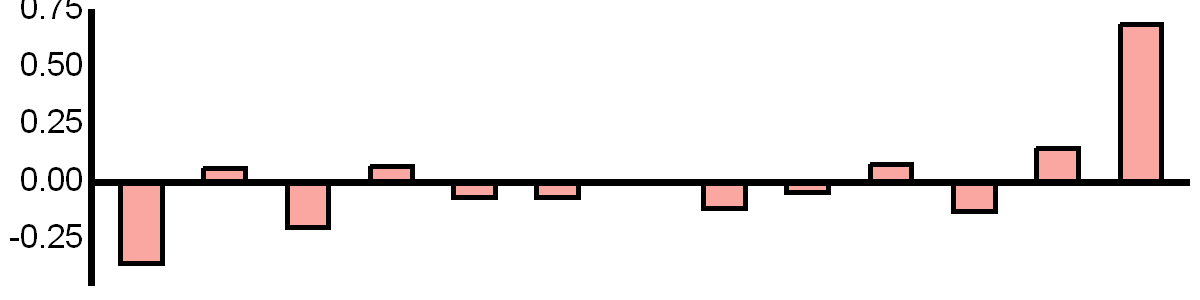

In [32]:
plot_regression_bar('formality','#F9918A')

png("../output_graph/regression/check_size/subvariables/formality.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('formality','#F9918A')
dev.off()

In [33]:
read.csv('output_data/reviewer_recommend/p_value_sub/check_size/formality_33d.csv',row.names=1)

ERROR: Error in file(file, "rt"): 无法打开链结


png 
  2

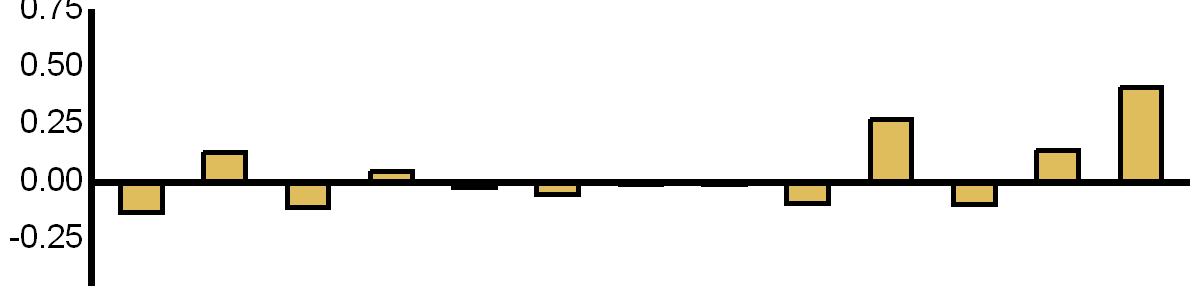

In [34]:
plot_regression_bar('activeness','#D7AB33')

png("../output_graph/regression/check_size/subvariables/activeness.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('activeness','#D7AB33')
dev.off()

In [35]:
read.csv('output_data/reviewer_recommend/p_value_sub/check_size/activeness_33d.csv',row.names=1)

ERROR: Error in file(file, "rt"): 无法打开链结


png 
  2

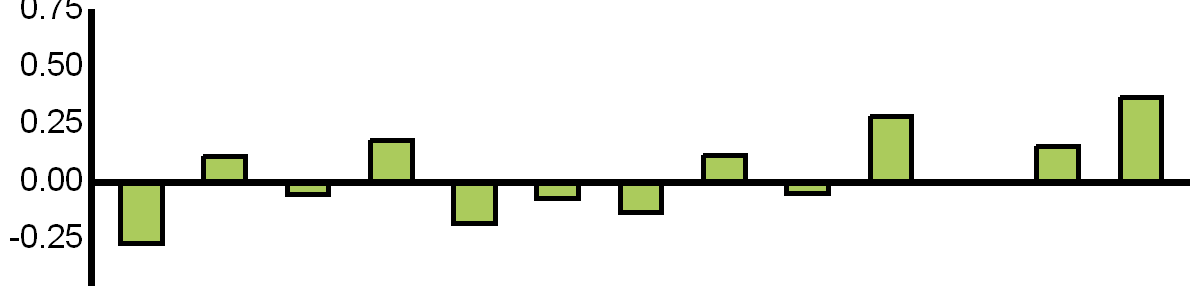

In [36]:
plot_regression_bar('valence','#96BE33')

png("../output_graph/regression/check_size/subvariables/valence.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('valence','#96BE33')
dev.off()

In [37]:
read.csv('output_data/rsa_results/p_value_sub/check_size/valence_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.853,0.2555,0.6099,0.1771,0.9075,0.8008,0.0671,0.479,0.1473,0.8016,0.2752,0.0719,0.6377,0.1896,0.5093


png 
  2

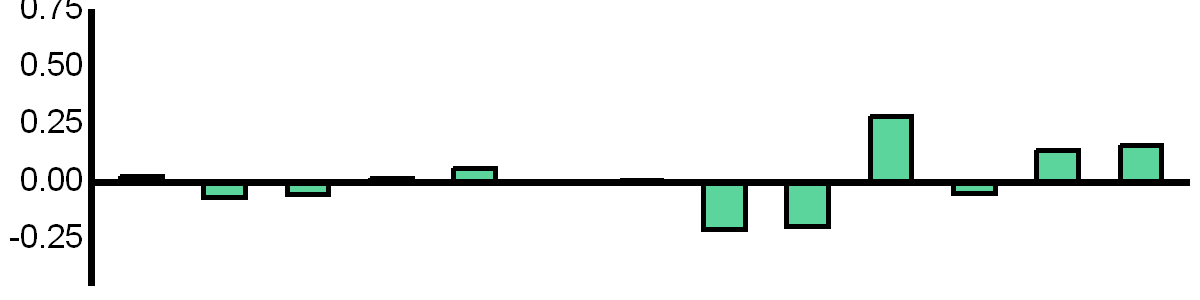

In [38]:
plot_regression_bar('exchange','#33CB85')

png("../output_graph/regression/check_size/subvariables/exchange.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('exchange','#33CB85')
dev.off()

In [39]:
read.csv('output_data/rsa_results/p_value_sub/check_size/exchange_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4675,0.6081,0.6207,0.3951,0.3173,0.514,0.0618,0.6322,0.1669,0.4859,0.8292,0.2475,0.9497,0.3956,0.6827


png 
  2

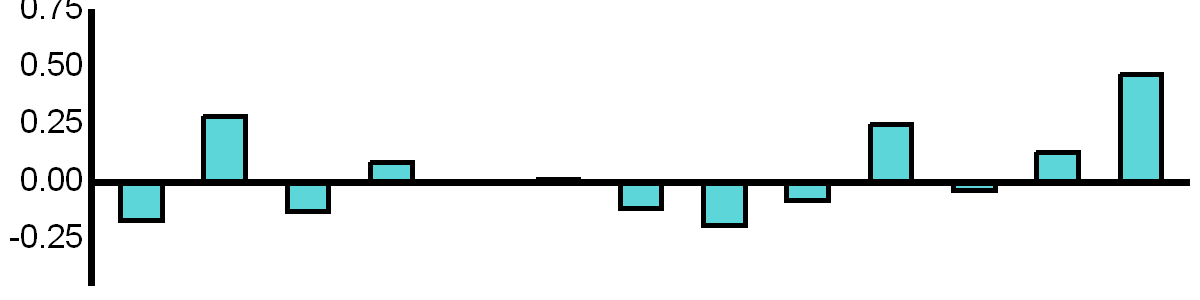

In [41]:
plot_regression_bar('equality','#33CCD0')

png("../output_graph/regression/check_size/subvariables/equality.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('equality','#33CCD0')
dev.off()

In [43]:
read.csv('output_data/rsa_results/p_value_sub/check_size/equality_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7447,0.063,0.8039,0.2928,0.4955,0.4496,0.0821,0.5888,0.1738,0.761,0.8014,0.0289,0.7311,0.2109,0.226


## Categorical

png 
  2

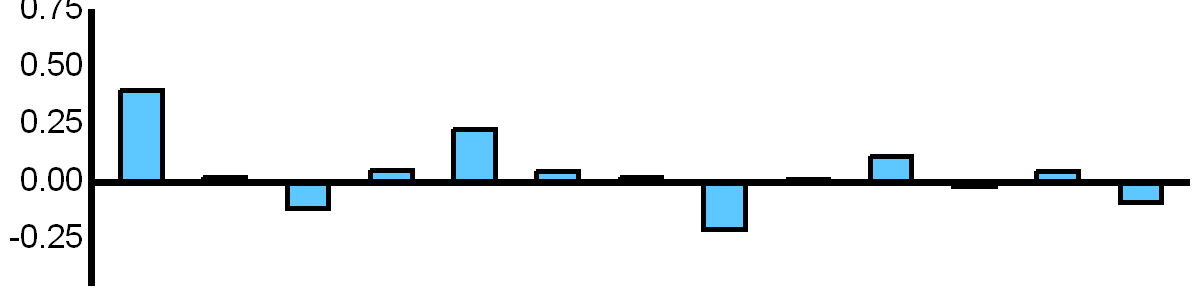

In [44]:
plot_regression_bar('hostile','#33BAFF')

png("../output_graph/regression/check_size/subvariables/hostile.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('hostile','#33BAFF')
dev.off()

In [46]:
read.csv('output_data/rsa_results/p_value_sub/check_size/hostile_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0066,0.3986,0.8656,0.2918,0.0244,0.2549,0.1527,0.5441,0.3041,0.4225,0.9487,0.6962,0.442,0.9444,0.9785


png 
  2

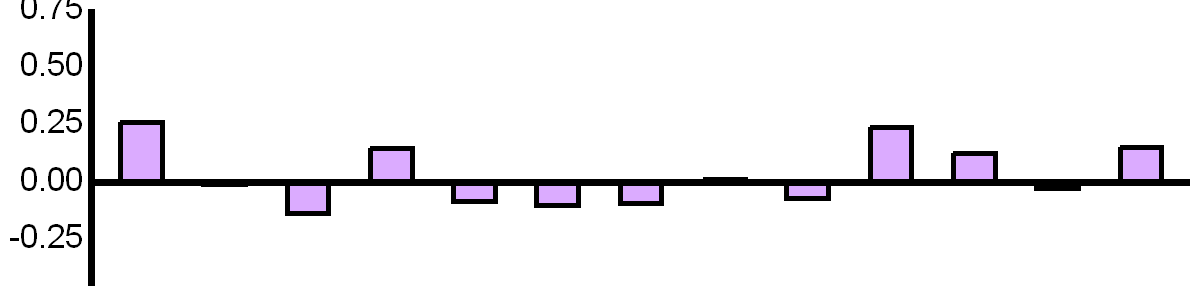

In [47]:
plot_regression_bar('private','#D296FF')

png("../output_graph/regression/check_size/subvariables/private.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('private','#D296FF')
dev.off()

In [48]:
read.csv('output_data/rsa_results/p_value_sub/check_size/private_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1063,0.4786,0.8592,0.1546,0.7558,0.886,0.0651,0.1358,0.5598,0.7524,0.4462,0.2376,0.7261,0.9934,0.6938


png 
  2

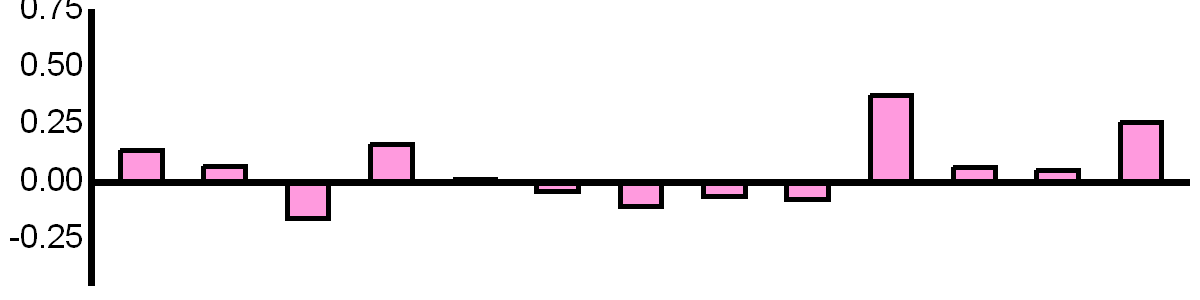

In [49]:
plot_regression_bar('public','#FF81D6')

png("../output_graph/regression/check_size/subvariables/public.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('public','#FF81D6')
dev.off()

In [50]:
read.csv('output_data/rsa_results/p_value_sub/check_size/public_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2929,0.2778,0.8768,0.1408,0.4506,0.6989,0.0292,0.2834,0.3152,0.747,0.5768,0.1434,0.7182,0.9702,0.6447
